 # Train your first neural network: basic classification
 In this notebook you will make a program that recognize hand written letters.
 But this is not a image recognition app, at least not a typical one.
 The letter data is in form of trace. A trace registered by digital tablet, the time and x, y
 coordinates. This method is original by me and will not be found else where.
 the feature used here is significantly smaller than the image input.
 ## You will learn
 1. read data from csv file using pandas
 2. data pre-processing and basice feature engineering. this is a "deep" learning
 model, so very minimum of feature enginerring.
 3. neural network model define and traning, evaluation and prediction
 4. visualizion result and plot confusion matrix
 **You will learning a lot in this single notebook**

 You see in python every non-basic function is in python modules that you must import
 before you use it.

In [1]:

# TensorFlow and tf.keras deep learning frameworks
import tensorflow as tf
from tensorflow import keras

# Helper libraries
# numpy gives you matrix like operations
import numpy as np
# matplotlib let you plot figures
import matplotlib.pyplot as plt
# this is a module written by us for this program specifically,
# as you should keep you code clean and readable. This are reusable functions.
import dataLoader as dl
# sklearn provides many useful functions related to ML.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# just check you have tf 2.0
print(tf.__version__)


2.1.0


In [2]:
# see the dataloader file for details
features,labels=dl.readData(r"..\Lesson2.6-before-deep-learning\machinelearning_course_files\Data")


 Plot a trace to see if we get everything right.
 **NOTE: **Here we plot the trace of the features and get a letter which looks the same as
 the hand written letter in the data. So this is just data cleaning no feature engineering.
 But the data is changed, and the Time is discared, so you can call it sort of feature engineering.

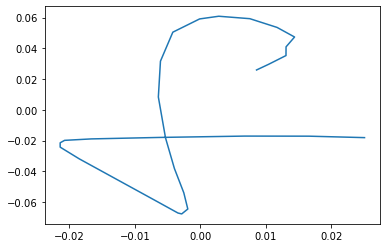

In [3]:
plt.plot(features[5,0:30],features[5,30:])
plt.suptitle="Real: "+labels[5]
plt.show()


 Split the data into train and test using sklearn with 20% for test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)



 ## Build the network
 Build a NN with Keras is the most simple thing in this notebook.
 The NN has 2 hidden layer, the numbers are choose randomly.
 The input has to match the feature size 60.
 The output is 26 to match the one hot encoded target. A softmax is used to regulate the
 out put to a probability distribution.
 ## Train it
 1. the optimizer is adam, this is a gradient decent optimizer, use this if you don't know which to use.
 2. the Loss is important `sparse_categorical_crossentropy`, this will encoder your categorical target as one hot than using
 cross entropy for the loss. cross entropy is common in classification and one hot target. It is like maximum likelihood method.

In [6]:

model = keras.Sequential([
    keras.Input(shape=(60)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# as I said, keras accept only numeric input the the Y have to be in a nparray of numbers.
# yes keras accept nparray not python list.
y=[]
for letter in y_train:
    y.append(dl.letter2Number(letter))
y_train2=np.asarray(y)

y=[]
for letter in y_test:
    y.append(dl.letter2Number(letter))
y_test2=np.asarray(y)


In [8]:
# batch size is random
# 1000 epoch will almost hit the limit in this data set
model.fit(X_train, y_train2,batch_size=1500, epochs=1000)


sample - loss: 0.2302 - accuracy: 0.9371
Epoch 817/1000
3099/3099 [==============================] - 0s 6us/sample - loss: 0.2294 - accuracy: 0.9364
Epoch 818/1000
3099/3099 [==============================] - 0s 5us/sample - loss: 0.2295 - accuracy: 0.9371
Epoch 819/1000
3099/3099 [==============================] - 0s 5us/sample - loss: 0.2297 - accuracy: 0.9380
Epoch 820/1000
3099/3099 [==============================] - 0s 4us/sample - loss: 0.2299 - accuracy: 0.9387
Epoch 821/1000
3099/3099 [==============================] - 0s 5us/sample - loss: 0.2292 - accuracy: 0.9387
Epoch 822/1000
3099/3099 [==============================] - 0s 4us/sample - loss: 0.2288 - accuracy: 0.9374
Epoch 823/1000
3099/3099 [==============================] - 0s 5us/sample - loss: 0.2285 - accuracy: 0.9364
Epoch 824/1000
3099/3099 [==============================] - 0s 5us/sample - loss: 0.2284 - accuracy: 0.9361
Epoch 825/1000
3099/3099 [==============================] - 0s 5us/sample - loss: 0.2292 - accu

In [9]:
# keras models have building evaluation for accuracy
test_loss, test_acc = model.evaluate(X_test, y_test2)
print('Test accuracy:', test_acc)

# make a prediction of the whole test set
y_hat=model.predict(X_test)

# calculate the accuracy by yourself, it is allway better knowing how numbers are calculated
y_hat=np.argmax(y_hat,axis=1)
acc=sum((y_hat==y_test2).tolist())/y_hat.size
print('Test accuracy:', acc)
y_hat_letters=[]
for num in y_hat:
    y_hat_letters.append(dl.number2Letter(num))


775/775 [==============================] - 0s 135us/sample - loss: 0.5824 - accuracy: 0.8684
Test accuracy: 0.8683871
Test accuracy: 0.8683870967741936


 Show the final result, change test sample to see the result
 Calculate the confution matrix using sklearn and plot it.

Real: B Predicted: B


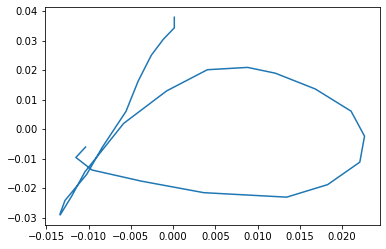

In [10]:
test_sample=55
plt.plot(X_test[test_sample,0:30],X_test[test_sample,30:])
result="Real: "+y_test[test_sample] + " Predicted: "+ y_hat_letters[test_sample]
print(result)
plt.suptitle=result
plt.show()


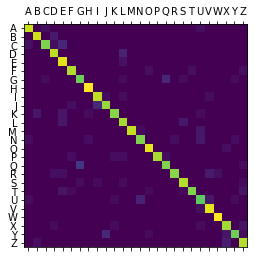

In [11]:
con_mat=confusion_matrix(y_test, y_hat_letters,labels=dl.getAlphabet(),normalize="true")
plt.matshow(con_mat)
plt.xticks(np.arange(26),dl.getAlphabet())
plt.yticks(np.arange(26),dl.getAlphabet())
plt.show()

